In [1180]:
using Plots,FileIO
include("GKTooLkit.jl");

In [689]:
ns=[8,16,32,64,128,256]
ees=[]
averagenum=100
ps=collect(0.1:0.01:0.2)

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        halflengthee=0
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            measurementbasis=zproductstate(n)
            
            for t=1:n
                for j=1+t%2:2:n-1
                    applyunitary!(stab, randomunitary(2),[j,j+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            halflengthee+=entanglement(stab,collect(1:n÷2))
        end
        
        push!(ee,halflengthee/averagenum)
    end
    push!(ees,ee)
end







8: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
16: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
32: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
64: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
128: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 
256: 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 

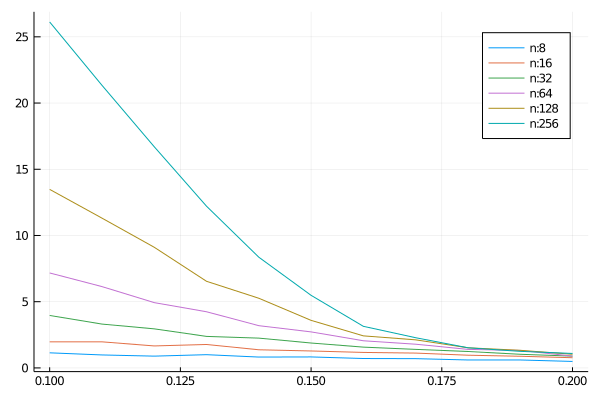

In [695]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)

In [906]:
ns=[8,16,32,64]
ees=[]
averagenum=1000
ps=collect(0.0:0.05:0.3)
ancillanum=1

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        ancillaee=0
        
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            stabsign=zeros(UInt8,n)
            stab,stabsign=addqubit(stab,ancillanum,stabsign)
            
            measurementbasis=zproductstate(n+ancillanum)
            for t=1:10
                for j=1:n+ancillanum
                    applyunitary!(stab, randomunitary(2),sample(1:n+ancillanum,2,replace=false))
                end
            end
            
            for t=1:2n
                for j=1+t%2:2:n
                    applyunitary!(stab, randomunitary(2),[j,j%n+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            ancillaee+=entanglement(stab,n+1:n+ancillanum)
        end
        
        push!(ee,ancillaee/averagenum)
    end
    push!(ees,ee)
end



8: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
16: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
32: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
64: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 

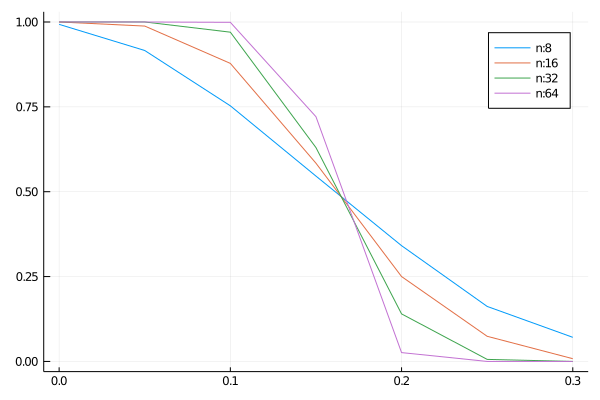

In [907]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)

In [1000]:
ns=[8,16,32,64]
ees=[]
averagenum=1000
ps=collect(0.0:0.05:0.3)
ancillanum=1

for n in ns
    print("\n$n: ")
    
    ee=[]
    for p in ps
        print("$p, ")
        ancillaee=0
        
        
        for r=1:averagenum
            
            stab=zproductstate(n)
            stabsign=zeros(UInt8,n)
            stab,stabsign=addqubit(stab,ancillanum,stabsign)
            
            measurementbasis=zproductstate(n+ancillanum)
            
            xxstabilizer=zeros(UInt8,2(n+1))
            xxstabilizer[n]=1
            xxstabilizer[n+1]=1

            measurestabilizer!(stab, xxstabilizer,stabsign)
            
            for t=1:2n
                for j=1+t%2:2:n
                    applyunitary!(stab, randomunitary(2),[j,j%n+1])
                end
                for j=1:n
                    if rand()<p
                        measurestabilizer!(stab, measurementbasis[j,:])
                    end
                end
            end
            
            ancillaee+=entanglement(stab,n+1:n+ancillanum)
        end
        
        push!(ee,ancillaee/averagenum)
    end
    push!(ees,ee)
end



8: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
16: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
32: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 
64: 0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 

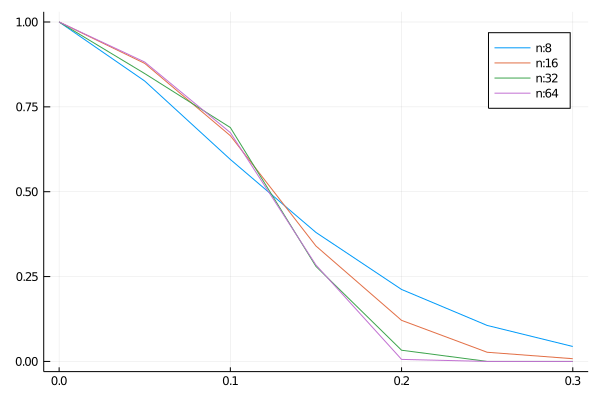

In [1001]:
plt=plot()

for i=1:length(ns)
    n=ns[i] 
#     if n<32 continue end
    plot!(plt,ps,ees[i],label="n:$n")
end
display(plt)

In [1260]:
n=16
T=2n
averagenum=100000#2*10^6
p=0.3
ancillanum=1

us=allcliffordunitaries(2)


usindex=rand(1:length(us),T,n÷2)
ussigns=rand([0x00,0x01],T,n÷2,4)
measure=map(x->x<p,rand(T,n))


datafile=open("data.txt","w")

      
for r=1:averagenum
    if r%1000==0
        print(r,",")
    end

    stab=zproductstate(n)
    stabsign=zeros(UInt8,n)
    stab,stabsign=addqubit(stab,ancillanum,stabsign)

    measurementbasis=zproductstate(n+ancillanum)

    xancilla=zeros(UInt8,2(n+1))
    xancilla[n+1]=1

    yancilla=zeros(UInt8,2(n+1))
    yancilla[n+1]=1
    yancilla[n+1+n+1]=1

    zancilla=zeros(UInt8,2(n+1))
    zancilla[n+1+n+1]=1

    xxstabilizer=zeros(UInt8,2(n+1))
    xxstabilizer[n]=1
    xxstabilizer[n+1]=1


    measurestabilizer!(stab, xxstabilizer,stabsign)

    for t=1:T
        
        for j=1+t%2:2:n
            applyunitary!(stab, us[usindex[t,(j-t%2+1)÷2]],[j,j%n+1],ussigns[t,(j-t%2+1)÷2,:],stabsign)
        end

        for j=1:n
            if measure[t,j]
                outcome=measurestabilizer!(stab, measurementbasis[j,:],stabsign,true)
                write(datafile,"$outcome,")
            else
                write(datafile,"0,")
            end
        end
    end
    
    anc=(expectationvalue(stab,xancilla,stabsign),expectationvalue(stab,yancilla,stabsign),expectationvalue(stab,zancilla,stabsign))
    write(datafile,"$(anc[1]),$(anc[2]),$(anc[3])\n")

end

close(datafile)

1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,

In [1153]:

measure

32×16 Array{Bool,2}:
 0  1  0  0  1  0  0  1  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0
 0  0  0  0  0  0  1  1  0  1  0  1  0  0  0  0
 0  0  1  1  0  0  1  0  0  1  0  0  0  1  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  1  1  0  1  0  0
 1  0  0  0  0  0  0  0  0  1  0  1  1  0  1  0
 0  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0
 1  0  1  1  0  0  0  1  0  1  1  1  0  0  1  0
 0  0  0  0  1  1  0  0  0  0  1  0  1  1  0  0
 0  1  0  1  1  0  0  0  0  0  0  0  1  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1
 0  0  1  1  0  1  0  1  0  0  0  0  0  0  1  0
 ⋮              ⋮              ⋮              ⋮
 0  0  0  0  1  1  0  0  0  0  0  1  1  1  0  0
 0  0  0  0  0  1  0  0  1  1  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  1  1  0  1  1  1  0
 0  0  0  0  0  0  1  1  0  0  1  1  0  0  0  0
 1  0  1  0  0  1  0  0  0  0  1  1  1  1  1  0
 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  1  

In [1173]:
a=[1 1;2 1]

2×2 Array{Int64,2}:
 1  1
 2  1

In [1174]:
b=transpose(copy(a))

2×2 Transpose{Int64,Array{Int64,2}}:
 1  2
 1  1

In [1175]:
b[1,1]=0

0

In [1176]:
a

2×2 Array{Int64,2}:
 1  1
 2  1